# Introduction to Network Analysis in Python

From online social networks such as Facebook and Twitter to transportation networks such as bike sharing systems, networks are everywhere—and knowing how to analyze them will open up a new world of possibilities for you as a data scientist. This course will equip you with the skills to analyze, visualize, and make sense of networks. You'll apply the concepts you learn to real-world network data using the powerful NetworkX library. With the knowledge gained in this course, you'll develop your network thinking skills and be able to look at your data with a fresh perspective.

**THOUGHT:** Any way to incorporate network analysis into a regression model (ie for COVID)? \
177 hrs

## 1. Introduction to Networks
In this chapter, you'll be introduced to fundamental concepts in network analytics while exploring a real-world Twitter network dataset. You'll also learn about NetworkX, a library that allows you to manipulate, analyze, and model graph data. You'll learn about the different types of graphs and how to rationally visualize them.

#### Introduction to Networks
* Eric Ma: a Data Scientist working at the intersection of biological network science and infectious disease with a deep understanding of network analytics.
* Some examples of networks:
    * Social networks
        * models the relationships between people
    * Transportation networks
        * models the connectivity between locations, as determined by roads or flight paths connecting them
* At their core, **networks are a useful tool for modeling relationships between entities.**
* By modeling your data as a network, you can end up gaining insight into what entities (or nodes) are important, such as broadcasters or influencers in a social network.
* **Insights:**
    * **Important entities:** influencers in social network
    * **Pathfinding:** most efficient transport path
    * **Clustering:** finding communities
    
#### Network Structure
* Networks are described by two sets of items: 
    * **Nodes**
    * **Edges**
* Together, these form a "network," otherwise known in mathematical terms as a "graph."
* Nodes and edges can have metadata associated with them.
* In the Python world, there is a library called NetworkX that allows us to manipulate, analyze, and model graph data.

#### NetworkX API Basics
* Using `nx.Graph()`, we can initialize an empty graph to which we can nodes and edges
* We can add, for example, the integers 1, 2, and 3 as nodes, using the `.add_nodes_from()` method and passing in the list `[1, 2, 3]` as an argument. 

```
import networkx as nx
G = nx.Graph()
G.add_nodes_from([1, 2, 3])
G.nodes()
```
* Output:
* `[1, 2, 3]`
* The Graph object G has a `.nodes()` method that allows us to see what nodes are present in the graph, and returns a list of nodes. 

```
G.add_edge(1,2)
G.edges()
```
* Output:
* `[(1, 2)]`
* If we add an edge between the nodes 1 and 2, we can then use the `G.edges()` method to return a list of tuples which represent the edges, in which each tuple shows the nodes that are present on that edges.
* Metadata can be stored on the graph as well
* For example, add to the node 1, a 'label' key with the value 'blue', just as we would assign a value to the key of a dictionary.
* We can then retrieve the node list **with the metadata attached** using `G.nodes()`, passing in the **`data=True`** argument

```
G.node[1]['label'] = 'blue'
G.nodes(data=True)
```
* Outputs:
* `[(1, {'label': 'blue'}), (2, {}), (3, {})]`
* This returns a list of 2-tuples, in which the first element of each tuple is the node, and the second element is a dictionary in which the key-value pairs correspond to my metadata.

* **NetworkX** also provides basic drawing functionality, using the `nx.draw()` function, which takes in a Graph, `G` as an argument.

```
nx.draw(G)
import matplotlib.pyplot as plt
plt.show()
```
* With this graph the `nx.draw()` function will draw to screen what we call a **node-link diagram rendering of the graph.**

#### Queries on a graph
* Now that you know some basic properties of the graph and have practiced using NetworkX's drawing facilities to visualize components of it, it's time to explore how you can query it for nodes and edges.
* Specifically, you're going to look for **nodes of interest** and **edges of interest**.
* To achieve this, you'll make use of the **`.nodes()`** and **`.edges()`** methods.
    * The **`.nodes()`** method returns a list of nodes
    * The **`.edges()`** method returns a list of tuples, in which each tuple shows the nodes that are present on that edge.
    * Passing in the keyword argument `data = True` in these methods retrieves the corresponding metadata associated with the nodes and edges as well.
* Write **list comprehensions** to effectively build these queries in one line.
    * $\star$ `[` output expression `for` iterator variable `in` iterable `if` predicate expression `]` $\star$
    
```
# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']

# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'] < date(2010, 1,1)]
```

#### Types of Graphs
* NetworkX allows us to model different types of graphs:

#### Undirected Graphs
* Facebook social graphs, for example
* **Undirected graphs** are named as such because they are comprised of edges that don't have any inherent directionality associated with them. 
* With Facebook, for example, when one used befriends another, the two are automatically connected with an edge
* This is most commonly drawn as a line with no arrows between two circles.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
#import nxviz as nv

In [2]:
G = nx.Graph()
type(G)

networkx.classes.graph.Graph

* Instantiate an empty graph in NetworkX using `nx.Graph` and ask for its type.
* **Undirected graphs** have the type **Graph**.

#### Directed graphs
* For example: Twitter's social graph
* This is because the nature of how users interact with one another.
* For example, one user may follow another, but that user may not follow back.
* As such, there is an inherent directionality associated with the graph.
* Instantiate an empty directed graph:

In [3]:
D = nx.DiGraph()
type(D)

networkx.classes.digraph.DiGraph

* **Directed graphs** have the type **DiGraph**.

#### Multi(Di)Graph
* We can also have graphs in which there are multiple edges permitted between the nodes. 
* For example, we may want to model trips between bike sharing stations.
* Each trip may be one edge between the pair of stations

In [4]:
M = nx.MultiGraph()
type(M)

networkx.classes.multigraph.MultiGraph

In [5]:
MD = nx.MultiDiGraph()
type(MD)

networkx.classes.multidigraph.MultiDiGraph

#### Weights on graphs
* Sometimes, for practical reasons, it may be too memory-intensive to model multiple edges per pair of nodes, and so one may choose to collapse the edges into a single edge that contains a metadata summary of the original.
* **Edges** can contain **weights**.
* For example, you may want to collapse three identical edges (identical in direction and between which nodes) into a single edge and give them a "weight" metadata with the value "3," indicating that it was originally 3 edges between the pair of nodes.

#### Self-loops
* Nodes that are connected to themselves. 
* Self-loops can be used in certain scenarios, such as in bike sharing data, where a trip begins at a station and ends at the same station.

#### Specifying weights on edges 
Weights can be added to edges in a graph, typically indicating the "strength" of an edge. In NetworkX, the weight is indicated by the `weight` key in the metadata dictionary.

* Refer to the following template to set an attribute of an edge: 
    * **`network_name.edges[node1, node2]['attribute'] = value`** 
    * Here, the `attribute` is `weight`
    
```
# Set the weight of the edge
T.edges[1,10]['weight'] = 2
```

* Set the weight of every edge involving node `293` to be equal to `1.1`. To do this:
    * Using a `for` loop, iterate over all the edges of `T`, including the `metadata`.
    * If `293` is involved in the list of nodes `[u, v]`:
    * Set the weight of the edge between `u` and `v` to be `1.1`.
    
```
# Set the weight of the edge
T.edges[1,10]['weight'] = 2

# Iterate over all the edges (with metadata)
for u, v, d in T.edges(data=True):

    # Check if node 293 is involved
    if 293 in [u, v]:

        # Set the weight to 1.1
        T.edges[u, v]['weight'] = 1.1
```

#### Checking whether there are self-loops in the graph
* NetworkX also allows edges that begin and end on the same node
* While this would be non-intuitive for a social network graph, it is useful to model data such as trip networks, in which individuals begin at one location and end in another.
* It is useful to check for this before proceeding with further analyses, and NetworkX graphs provide a method for this purpose: `.number_of_selfloops()`.
* In this exercise as well as later ones, you'll find the `assert` statement useful. Each `assert`-ions checks whether the statement placed after it evaluates to `True`, otherwise it will throw an `AssertionError`.
* Define a function that returns all nodes with self-loops in Graph G.

In [6]:
# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []

    # Iterate over all the edges of G
    for u, v in G.edges():

    # Check if node u and node v are the same
        if u == v:

            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)

    return nodes_in_selfloops

```
# Check whether number of self loops equals the number of nodes in self loops
assert T.number_of_selfloops() == len(find_selfloop_nodes(T))
```

#### Network visualization
You may have seen node-link diagrams involving more than a hundred thousand nodes. They purport to show a visual representation of the network, but in reality just show a hairball. We're going to look at alternate ways of visualizing network data that are much more rational.
* **Matrix plots**
* **Arc plots**
* **Circos plots**

#### Matrix plots
* In a matrix plot, nodes are the rows and columns of a matrix, and cells are filled in according to whether an edge exissts between the pairs of nodes. 
* **Undirected matrices:**
    * The matrix is symmetrical around the diagonal (top left $\Rightarrow$ bottom right)
    * The edge AB is equivalent to edge BA - because there is no directionality associated with that edge
    * The edge AC is equivalent to edge CA - because there is no directionality associated with it
* **Directed matrices:**
    * The matrix representation is not necessarily going to be symmetrical.
    * If the nodes are ordered along the rows and columns such that the neighbors are listed close to one another, then a matrix plot can be used to visualize **clusters**, or communities, of nodes. 
    
#### Arc Plots
* An arc plot is a transformation of the node-link diagram layout, in which nodes are ordered along one axis of the plot, and edges are drawn using circular arcs from one node to another. 
* If the nodes are ordered according to some sortable rule (**ordered axis**)-- for example, age in a social network of users-- or otherwise grouped together by geographic lovation in a map for a transportation network, then it will be possible to visualize the relationship between connectivity and the sorted (or grouped) property. 
* **Arc plots are a good starting point for visualizing a network as it forms the basis of the later plots that we'll take a look at (more complicated ones).**

#### Circos Plots 
* A Circos plot is a transformation of the Arc plot, such that the two ends of the Arc plot are joined together in a circle.
* Circos plots were originally designed for use in genomics and you can think of them as an aesthetic and compact alternative to Arc plots. 
* We will be using a plotting utility that Eric Ma (instructor) developed called `nxviz` 

## nxviz API
* Suppose we had a graph, G, in which we added nodes and edges
* Instantiate a new `nv.ArcPlot()` object, and pass in a graph G
* We can also order nodes by the values keyed on some "key"

In [7]:
#import nxviz as nv
#import matplotlib.pyploy as plt
ap = nv.ArcPlot(G)
ap.draw()
plt.show()

NameError: name 'nv' is not defined

[Towards Data Science nxvix article](https://towardsdatascience.com/chord-diagrams-of-protein-interaction-networks-in-python-9589affc8b91)
#### Chord Diagrams
* **Chord Diagrams** are circular plots that are great for displaying relationships between objects of a set, such as nodes and connections in a network.
    * A basic chord diagram has a ring of objects connected by chords that indivate relationships 
    * (As of 2020) `nxviz` is one of the few Python libraries that can be usedto create plots in this style (chord diagrams/ Circos plots- originally written in Perl)
    
```
### The required libraries and packages ###
import networkx as nx
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import cm
from nxviz.plots import CircosPlot
```

* Once a NetworkX graph has been created, a **basic** Circos-stype plot can be generated very quickly, with just three lines of code:

```
c = CircosPlot(G, node_labels=True)
c.draw()
plt.show()
```

* Example code to include both edge weight and node degree information:

```
c = CircosPlot(graph = g, 
               figsize = (13, 13), 
               node_grouping='class', 
               node_color='class',
               edge_width='weight',
               node_labels=True)
               c.draw()
```
* Note that here (above) the nodes are colored based on their degree. 
* Also note that the widths of the edges indicate the score of the interaction; the wider the edge, the higher the score.
***

* Under the hood, the `MatrixPlot` utilizes `nx.to_numpy_matrix(G)`, which returns the matrix form of the graph.
* Here, each node is one column and one row, and an edge between the two nodes is indicated by the value 1. In doing so, however, only the weight metadata is preserved; all other metadata is lost, as you'll verify using an assert statement.
* A corresponding `nx.from_numpy_matrix(A)` allows one to quickly create a graph from a NumPy matrix. The default graph type is `Graph()`; if you want to make it a `DiGraph()`, that has to be specified using the `create_using` keyword argument, e.g. (`nx.from_numpy_matrix(A, create_using=nx.DiGraph)`)

```
# Import nxviz
import nxviz as nv

# Create the MatrixPlot object: m
m = nv.MatrixPlot(T)

# Draw m to the screen
m.draw()

plt.show()

# Convert T to a matrix format: A
A = nx.to_numpy_matrix(T)

# Convert A back to the NetworkX form as a directed graph: T_conv
T_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

# Check that the `category` metadata field is lost from each node
for n, d in T_conv.nodes(data=True):
    assert 'category' not in d.keys()
```
* Circos plots are a rational, non-cluttered way of visualizing graph data, in which nodes are ordered around the circumference in some fashion, and the edges are drawn within the circle that results, giving a beautiful as well as informative visualization about the structure of the network.

```
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import CircosPlot

# Create the CircosPlot object: c
c = CircosPlot(T)

# Draw c to the screen
c.draw()

# Display the plot
plt.show()
```

```
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import ArcPlot

# Create the un-customized ArcPlot object: a
a = ArcPlot(T)

# Draw a to the screen
a.draw()

# Display the plot
plt.show()

# Create the customized ArcPlot object: a2
a2 = ArcPlot(T, node_order = 'category', node_color = 'category')

# Draw a2 to the screen
a2.draw()

# Display the plot
plt.show()
```

# 2. Important nodes
You'll learn about ways to identify nodes that are important in a network. In doing so, you'll be introduced to more advanced concepts in network analysis as well as the basics of path-finding algorithms. The chapter concludes with a deep dive into the Twitter network dataset which will reinforce the concepts you've learned, such as degree centrality and betweenness centrality.

### Degree Centrality 
#### Important nodes
* Which nodes are important?
    * **Degree Centrality** 
    * **Betweenness Centrality**
* In the majority of situations, we would consider a center node to be more important when it is connected to more nodes. 
* Being connected to other nodes means other nodes are considered a **neighbor** of that node. 

#### Deggree Centrality
* The **degree centrality** metric is one of many metrics we can use to evaluate the importance of a node, and is simply defined as **the number of neighbors that a node has, divided by the total number of neighbors that the node could possibly have**.
    * There are two scenarios possible here: 
        * **If self-loops are allowed**, such as in a network mapping of all bike trips in a bike sharing system, then the number of neighbors that I could possibly have is **every single node in the graph, including myself.**
        * **If self-loops are not allowed**, such as in the Twitter social network where, by definition, my account cannot follow itself, then the number of neighbors I could possibly have is **every other node in the graph, excluding myself.**

* In real life, examples of nodes in a graph that have a high degree of centrality might be:
    * Twitter broadcasters
        * (users that are followed by many other users)
    * Airport transportation hubs
    * Disease super-spreaders
        * the individuals that epidemiologists would want to track down to help stop the spread of a disease. 
        
#### Number of neighbors
* NetworkX API for figuring out the number of neighbors that a node has. 
* Suppose we had a star graph, in which node 1 was connected to every other node
* **`G.neighbors()`** allows us to get back a list of neighbors for a given node in a graph
* `G.neighbors(1)` returns the neighbors of node 1.
* If you pass in a node that doesn't exist in the graph, you'll get back a long error trace with a final line that reads: `NetworkX Error: The node [n] is not in the graph
* **`nx.degree_centrality(G)`**:
    * takes in a graph object as an argument and returns a dictionary in which the key is the node and the value is the degree centrality score for that node. 
    * with the `degree_centrality` function, self-loops are not considered.

In [ ]:
# Define nodes_with_m_nbrs()
def nodes_with_m_nbrs(G, m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()

    # Iterate over all nodes in G
    for n in G.nodes():

        # Check if the number of neighbors of n matches m
        if len(list(G.neighbors(n))) == m:

            # Add the node n to the set
            nodes.add(n)
    # Return the nodes with m neighbors
    return nodes

```
# Compute and print all nodes in T that have 6 neighbors
six_nbrs = nodes_with_m_nbrs(T, 6)
print(six_nbrs)
```

#### Compute degree distribution
* The number of neighbors that a node has is called its **degree**.
* It's possible to compute the degree distribution across the entire graph. 

$\star$ `[` output expression `for` iterator variable `in` iterable `if` predicate expression `]` $\star$

```
# Compute the degree of every node: degrees
degrees = [len(list(T.neighbors(n))) for n in T.nodes()]

# Print the degrees
print(degrees)
```

* The **degree** of a node is the **number of neighbors** that it has.
* The **degree centrality** is the **number of neighbors divided by all possible neighbors that it could have.**
    *  Depending on whether self-loops are allowed, the set of possible neighbors a node could have could also include the node itself.
    
* The **`nx.degree_centrality(G)`** function returns a dictionary, where the keys are the nodes and the values are their degree centrality values.

```
# Import matplotlib.pyplot
import matplotlib.pyplot as plt
degrees = [len(list(T.neighbors(n))) for n in T.nodes()]

# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(T)

# Plot a histogram of the degree centrality distribution of the graph.
plt.figure()
plt.hist(list(deg_cent.values()))
plt.show()

# Plot a histogram of the degree distribution of the graph
plt.figure()
plt.hist(degrees)
plt.show()

# Plot a scatter plot of the centrality distribution and the degree distribution
plt.figure()
plt.scatter(degrees, list(deg_cent.values()))
plt.show()
```

### Graph algorithms

#### Finding paths 
* Pathfinding has many important applications.
* Pathfinding is important for:
    * **Optimization** problems, such as finding the shortest transportation path between two nodes. 
    * **Modeling**; i.e. disease spread, information spread in a social network.
    
* How do we find out whether there's a path between two nodes?
* And if there is a path, how do we find out what the shorteest path is?
* One way: **Breadth-first Search Algorithm**

#### Breadth-first search (BFS)
* In a BFS algorithm, you start from a particular node and iteratively search through its neighbors and neighbors' neighbors until you find the destination node.
* Example: Shortest path between two nodes.
* Pathfinding algorithms are important because they provide another way of assessing node importance.
* First developed in the 1950's as a way of finding the shortest path out of a maze.
* The algorithm essentially works as such:
    * If we start at the yellow node, we first ask for the yellow node's neighbors.
    * We then ask if the destination node is present in the set of yellow node's neighbors.
        * If not, we continue on.
            * Going out a second degree of separation, we ask for the neighbors of our neighbors
            * The destination node is still not present, so we continue on.
            * On our third degree of separation out, we see that the destination node is present
            * At this point, we can stop and ignore the next degree of separation.
         
#### Recall: Nodes

```
G                               # Graph object
len(G.edges())                  # 57
len(G.nodes())                  # 20
```
* To find a path between nodes 1 and 19:

```
G.neighbors(1)                  # [10, 5, 14, 7]
```
* Go one degree out, to the first node in the list of node `1`'s neighbors, which is node `10`.

```
G.neighbors(10)                 # [1, 19, 5, 17, 8, 9, 13, 14]
```

* If node `19` wasn't present, we'd go on to check node 5, which was the next node in th list of node `1`'s neighbors.
* Above we checked each node manually, but there is also an automatic version of the breadth-first search algorithm. 

In [ ]:
# Define path_exists()
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G, asserts if/that it does.
    """
    visited_nodes = set()

    # Initialize the queue of nodes to visit with the first node: queue
    queue = [node1]

    # Iterate over the nodes in the queue
    for node in queue:

        # Get neighbors of the node
        neighbors = G.neighbors(node)

        # Check to see if the destination node is in the set of neighbors
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

* Now that you've got the code for checking whether the destination node is present in neighbors, next up, you're going to extend the same function to write the code for the condition where the destination node is not present in the neighbors.

In [ ]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path does not exist between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
          
        else:
            # Add current node to visited nodes
            visited_nodes.add(node)

            # Add neighbors of current node that have not yet been visited
            queue.extend([n for n in neighbors if n not in visited_nodes])

You're now going to complete the problem by writing the code that returns False if there's no path between two nodes.

In [ ]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G and returns False if no path exists.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = list(G.neighbors(node))
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])

        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False

### Betweenness Centrality
* Let's now revisit our notions of what it means to be an important node, but this time, leveraging what we know about paths.

#### All shortest paths
* In the previous section, we learned about how to find the shortest path between any pair of nodes, using the breadth-first search algorithm
* Imagine now we use the BFS algorithm to find every shortest path between every pair of nodes. 
* What we would get back is the set of all shortest paths in a graph.
* **All shortest paths** are the set of paths in a graph, such that each path is the shortest path between a given pair of nodes, done for all pairs of nodes
    * **Set of paths**
    * **Each path is shortest path between a given pair of nodes**
    * **Done for all node pairs**
    
#### Betweenness centrality
* **Betweenness centrality** is defined as the number of shortest paths in a graph that pass through a node divided by the number of shortest paths that exist between every pair of nodes in a graph.
* Definition:
    * num. shortest paths through node
    * //
    * all possible shortest paths
* This metric captures a different view of importance:
    * In essence it captures bottleneck nodes in a graph, rather than highly connected nodes
* Application:
    * Individuals that bridge between two communities, say, liberal- and conservatice-leaning Twitter users
    * Critical information transfer links: where there are crucial links on the internet that bridge two or more networks of computers 
        * If we remove those crucial nodes in the internet, then information will not flow (at least not easily) between subnetworks. 
    * Bottleneck stations on a subway system.
    
#### Example
* High betweenness centrality, low degree centrality?
* Let's say we have a graph G that is a barbell graph
* `import networkx as nx`

In [ ]:
#pip install decorator==5.0.9

```
import neetworkx as nx
G = nx.barbell_graph(m1=5, m2=1)
nx.betweenness_centrality(G)
```

* `m1` is the number of nodes in the barbell ends
* `m2` is the number of nodes in the barbell bridge
* To get the **betweenness centrality**

In [ ]:
#pip install decorator==5.0.7

In [8]:
G = nx.barbell_graph(m1=5, m2=1)
nx.betweenness_centrality(G)

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.5333333333333333,
 6: 0.5333333333333333,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 5: 0.5555555555555556}

* **`betweenness_centrality()`** function takes in a graph object G as an argument:
    * returns a dictionary, just like the `degree_centrality()`
    * **nodes** are the **keys**
    * **betweenness centrality scores** are the **values**
* Notice that some of the nodes above have a betweenness centrality score of `0`: that's because they are located at the ends of the barbell graph and the nodes within each end are fully connected with one another.

### NetworkX betweenness centrality on a social network
* Betweenness centrality is a node importance metric that uses information about the shortest paths in a network. It is defined as the fraction of all possible shortest paths between any pair of nodes that pass through the node.
* NetworkX provides the `nx.betweenness_centrality(G)` function for computing the betweenness centrality of every node in a graph, and it returns a dictionary where the keys are the nodes and the values are their betweenness centrality measures.

```
# Compute the betweenness centrality of T: bet_cen
bet_cen = nx.betweenness_centrality(T)

# Compute the degree centrality of T: deg_cen
deg_cen = nx.degree_centrality(T)

# Create a scatter plot of betweenness centrality and degree centrality
plt.scatter(list(bet_cen.values()), list(deg_cen.values()))

# Display the plot
plt.show()
```

#### Deep Dive: Twitter
* You're going to now take a deep dive into a Twitter network, which will help reinforce what you've learned earlier. First, you're going to find the nodes that can broadcast messages very efficiently to lots of people one degree of separation away.
* **Task 1:**
* Write a function `find_nodes_with_highest_deg_cent(G)` that returns the node(s) with the highest degree centrality

In [9]:
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)

    # Compute the maximum degree centrality: max_dc
    max_dc = max(list(deg_cent.values()))

    nodes = set()

    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():

        # Check if the current value has the maximum degree centrality
        if v == max_dc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

```
# Find the node(s) that has the highest degree centrality in T: top_dc
top_dc = find_nodes_with_highest_deg_cent(T)
print(top_dc)

# Write the assertion statement
for node in top_dc:
    assert nx.degree_centrality(T)[node] == max(nx.degree_centrality(T).values())
```

#### Deep Dive: Twitter II
* Next, you're going to do an analogous deep dive on betweenness centrality!
* Write a function `find_node_with_highest_bet_cent(G)` that returns the node(s) with the highest betweenness centrality.

In [10]:
# Define find_node_with_highest_bet_cent()
def find_node_with_highest_bet_cent(G):

    # Compute betweenness centrality: bet_cent
    bet_cent = nx.betweenness_centrality(G)

    # Compute maximum betweenness centrality: max_bc
    max_bc = max(list(bet_cent.values()))

    nodes = set()

    # Iterate over the betweenness centrality dictionary
    for k, v in bet_cent.items():

        # Check if the current value has the maximum betweenness centrality
        if v == max_bc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

```
# Use that function to find the node(s) that has the highest betweenness centrality in the network: top_bc
top_bc = find_node_with_highest_bet_cent(T)
print(top_bc)

# Write an assertion statement that checks that the node(s) is/are correctly identified.
for node in top_bc:
    assert nx.betweenness_centrality(T)[node] == max(nx.betweenness_centrality(T).values())
```

# 3. Structures
This chapter is all about finding interesting structures within network data. You'll learn about essential concepts such as cliques, communities, and subgraphs, which will leverage all of the skills you acquired in Chapter 2.

### Communities & Cliques
* The concepts of structures and subgraphs using `NetworkX`: will make particular use of pathfinding and neighbors.

#### Cliques
* **Network cliques:** completely connected graphs
* In network theory, a **clique** is essentially defined on the social version of a clique: **a set of nodes that are completely connected by an edge to every other node in the set.**
    * It is then, a **completely connected graph**.
* What is the **simplest clique**?
    * An **edge is the simplest clique possible.**
* What is the **simplest complex clique**?
    * A **triangle**, or **three fully-connected nodes**.
    
#### Triangle Applications
* Friend recommendation systems ("close the loop")
    * For example, if A knows B and A knows C, but B and C are not yet connected, then there's an arguably good chance that B knows C as well, and may want to be connected online, by doing what we call **triangle closures**
   
#### Clique Code
* Code that finds all triangles that a node is involved in?
* Suppose you had a graph, G, and you wanted to iterate over every pair of nodes, and not only every edge.
    * Rather than writing a double for-loop, you might want to use the `combinations` function from the Python `itertools` module.
    * In this way, your for-loop can iterate over every pair of nodes in the network by using the following code:
    * `for n1, n2 in combinations(sequence, size of combination)`
    
```
from itertools import combinations
for n1, n2 in combinations(G.nodes(), 2):
    print(n1, n2)
```
#### Identifying Triangle Relationships

In [12]:
#from itertools import combinations

# Define is_in_triangle()
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not.

    Returns a boolean.
    """
    in_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if an edge exists between n1 and n2
        if G.has_edge(n1, n2):
            in_triangle = True
            break
    return in_triangle

#### Finding Nodes Involved in Triangles
* NetworkX provides an API for counting the number of triangles that every node is involved in: `nx.triangles(G)`
* It returns a dictionary of nodes as the keys and number of triangles as the values. Your job in this exercise is to modify the function defined earlier to extract all of the nodes involved in a triangle relationship with a given node.

In [13]:
#from itertools import combinations

# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1, n2):

            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)

            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)

    return triangle_nodes

```
# Write the assertion statement
assert len(nodes_in_triangle(T, 1)) == 35
```

#### Finding Open Triangles
* Let us now move on to finding open triangles! Recall that they form the basis of friend recommendation systems; if "A" knows "B" and "A" knows "C", then it's probable that "B" also knows "C".
* Write a function `node_in_open_triangle()` that has two parameters - G and n - and identifies whether a node is present in an open triangle with its neighbors.

In [14]:
#from itertools import combinations

# Define node_in_open_triangle()
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1, n2):

            in_open_triangle = True

            break

    return in_open_triangle

```
# Compute the number of open triangles in T
num_open_triangles = 0

# Iterate over all the nodes in T
for n in T.nodes():

    # Check if the current node is in an open triangle
    if node_in_open_triangle(T, n):

        # Increment num_open_triangles
        num_open_triangles += 1

print(num_open_triangles)
```

#### Maximal Cliques
* **Maximal Cliques** are a clique, but that clique cannot be extended by adding another node in the graph
    * In other words, a clique that, when extended by one node, is no longer a clique
* **Applications:** community- finding algorithms

#### Communities
* Without going into the myriad of possible details, to define a **community** at a **basic level:**
    * Find cliques
    * Find unions of cliques
* Cliques form a good starting point for finding communities, as they are fully connected subgraphs within a larger graph.
* By identifying these maximal cliques, one naive way of identifying communities might be identifying the unions of maximal cliques that share some number of members, but are also of some minimum size. 

#### Finding Maximal Cliques
* **`find_cliques`** finds all maximum cliques
    * **Remember:** that `find_cliques` will not find just any clique, but only the set of **maximal cliques**.

In [15]:
# import networkx as nx

G = nx.barbell_graph(m1=5, m2=1)
nx.find_cliques(G)

<generator object find_cliques at 0x7fe0610c20b0>

* If we apply the `nx.find_cliques` function, we will find that it returns a generator, which we can iterate over (but it **doesn't** return the list of maximal cliques)
* To get the list of maximal cliques, **we need to cast that as a list.**

In [16]:
# import networkx as nx

G = nx.barbell_graph(m1=5, m2=1)
nx.find_cliques(G)
list(nx.find_cliques(G))

[[4, 0, 1, 2, 3], [4, 5], [6, 5], [6, 7, 8, 9, 10]]

* It should be clear that there are **two maximal cliques of size 5** in this graph: the two ends of the barbell:
    * `[4, 0, 1, 2, 3]`
    * `[6, 7, 8, 9, 10]`
* There are **also two maximal cliques of size 2**: these are the edges between nodes 4 and 5, and nodes 5 and 6.
* **Recall that edges are also a clique.**

#### Finding all maximal cliques of size "n"
* Maximal cliques are cliques that cannot be extended by adding an adjacent edge, and are a useful property of the graph when finding communities. 
* NetworkX provides a function that allows you to identify the nodes involved in each maximal clique in a graph: `nx.find_cliques(G)`

In [18]:
# Define maximal_cliques()
def maximal_cliques(G, size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == size:
            mcs.append(clique)
    return mcs

```
# Check that there are 33 maximal cliques of size 3 in the graph T
assert len(maximal_cliques(T, 3)) == 33
```

### Subgraphs
* When you have a large graph, and you want to visualize just a small portion of it, it can be helpful to extract those nodes and their associated edges as a **separate graph object**.
* **Visualize portions of a large graph:**
    * Paths
    * Communities/cliques
    * Degrees of separation from a node
* In all of these scenarios, it's useful to be able to "slice out" the nodes and edges of interest and visualize them.
* Below, n = number of nodes in the graph)
* Below, p = 0.2 for the probability that an edge exists between a given pair of nodes. 
* The graph is generated probabilistically and, in this instance, has 20 nodes, connected by 37 edges (each time you run, different number edges generated based on probability).

In [27]:
# import networkx as nx
G= nx.erdos_renyi_graph(n=20, p=0.2)
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19))

In [28]:
len(G.edges())

46

* Let's say I'm interested in plotting node 8 and its neighbors
* I can first initialize a list called nodes, comprised of the neighbors of node 8
* Then append node 8 itself to the list

In [32]:
nodes = G.neighbors(8)
nodes = list(nodes)

In [33]:
nodes.append(8)

In [34]:
nodes

[0, 5, 16, 17, 8]

* To get the subgraph of the five nodes, use the `G.subgraph()` function, passing in the nodes list, and assign the result to a new graph called `G_eight`

In [35]:
G_eight = G.subgraph(nodes)

* `G_eight` will have the node 8 and its neighbors and the four edges that connect node 8 to its neighbors
* In addition, it will contain the edges that exist between node 8's neighbors, such as the edge between node 2 and 10.
* If we check the data type of both graphs, we'll notice that they will both have the same data type.

In [36]:
type(G)

networkx.classes.graph.Graph

In [37]:
type(G_eight)

networkx.classes.graph.Graph

* We can draw the subgraph of those nodes by using the `nx.draw` function:

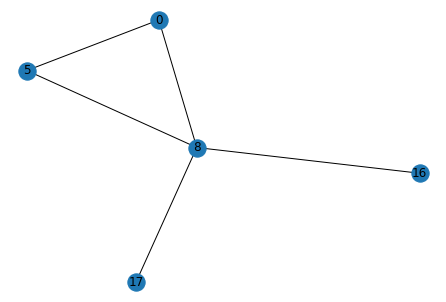

In [38]:
nx.draw(G_eight, with_labels=True)

Write a function `get_nodes_and_nbrs(G, nodes_of_interest)` that extracts the subgraph from graph `G` comprised of the `nodes_of_interest` and their neighbors.

In [40]:
# Define get_nodes_and_nbrs()
def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []

    # Iterate over the nodes of interest
    for n in nodes_of_interest:

        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)

        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):

            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)

    return G.subgraph(nodes_to_draw)

```
nodes_of_interest = [29, 38, 42]

# Extract the subgraph with the nodes of interest: T_draw
T_draw = get_nodes_and_nbrs(T, nodes_of_interest)

# Draw the subgraph to the screen
nx.draw(T_draw)
plt.show()
```

* Let's try one more exercise in which you extract nodes that have a particular metadata property and their neighbors. This should hark back to what you've learned about using list comprehensions to find nodes. The exercise will also build your capacity to compose functions that you've already written before.

```
# Extract the nodes of interest: nodes
nodes = [n for n, d in T.nodes(data=True) if d['occupation'] == 'celebrity']

# Create the set of nodes: nodeset
nodeset = set(nodes)

# Iterate over nodes
for n in nodes:

    # Compute the neighbors of n: nbrs
    nbrs = T.neighbors(n)

    # Compute the union of nodeset and nbrs: nodeset
    nodeset = nodeset.union(nbrs)

# Compute the subgraph using nodeset: T_sub
T_sub = T.subgraph(nodeset)

# Draw T_sub to the screen
nx.draw(T_sub)
plt.show()
```

### Case Study!
* GitHub could be considered a "social coding site," where users can collaborate on code in repositories.
* In this network, nodes are users, and edges indicate that two users are collaborators on at least on GitHub repository

#### Data
* GitHub user collaboration network
* Nodes: users
* Edges: collaboration on same GitHub repository
* **Goals:**
    * Analyze structure of the graph, including basic properties
    * Visualize the graph using `nxviz`
    * Build a simple recommendation system
* A **recommendation system** is social networks recommends users to "connect" with one another in some fashion.

**Recap:**
#### Graph properites

In [41]:
# import networkx as nx
G = nx.erdos_renyi_graph(n=20, p=0.2)

* To get number of edges:

In [42]:
len(G.edges)

33

* To get number of nodes:

In [43]:
len(G.nodes())

20

#### Degree Centrality

In [44]:
nx.degree_centrality(G)

{0: 0.2631578947368421,
 1: 0.05263157894736842,
 2: 0.21052631578947367,
 3: 0.21052631578947367,
 4: 0.10526315789473684,
 5: 0.05263157894736842,
 6: 0.10526315789473684,
 7: 0.05263157894736842,
 8: 0.10526315789473684,
 9: 0.3157894736842105,
 10: 0.21052631578947367,
 11: 0.15789473684210525,
 12: 0.10526315789473684,
 13: 0.21052631578947367,
 14: 0.3157894736842105,
 15: 0.21052631578947367,
 16: 0.3157894736842105,
 17: 0.15789473684210525,
 18: 0.21052631578947367,
 19: 0.10526315789473684}

#### Betweenness Centrality

In [45]:
nx.betweenness_centrality(G)

{0: 0.2658869395711501,
 1: 0.0,
 2: 0.1270955165692008,
 3: 0.08859649122807017,
 4: 0.10526315789473684,
 5: 0.0,
 6: 0.010721247563352826,
 7: 0.0,
 8: 0.0,
 9: 0.2,
 10: 0.23031189083820658,
 11: 0.031578947368421054,
 12: 0.010721247563352826,
 13: 0.08372319688109162,
 14: 0.19512670565302143,
 15: 0.12300194931773875,
 16: 0.1843079922027291,
 17: 0.04230019493177388,
 18: 0.03820662768031189,
 19: 0.0}

* In both cases what they return is a **dictionary**, in which the **key** is the **node name** and the **value** is the **centrality score of that node**.

```
len(G.nodes())
len(G.edges())

# Import necessary modules
#import matplotlib.pyplot as plt
#import networkx as nx

# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.degree_centrality(G).values()))
plt.show()

# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.betweenness_centrality(G).values()))
plt.show()
```

### Case Study part II: Visualization
#### nxviz API

```
import networkx as nx 
import nxviz as nv

G = nx.erdos_renyi_graph(n=20, p=0.3)
circ = nv.CircosPlot(G, 
                     node_color = 'key',
                     node_group = 'key')
circ.draw()
```

#### Connected Component Subgraph 
* **Connected component subgraph:** a set of nodes connected to one another by some path in the subgraph, and not connected to other nodes in the larger graph

**$\star$ NOTE: below function removed from networkx library with version 2.4$\star$**
```
# import networkx as nx
G = nx.erdos_renyi_graph(n=100, p=0.3)
nx.connected_component_subgraphs(G)
```

**$\star$ Use instead: `nx.connected_components` for components (not subgraphs) $\star$**

In [49]:
#import networkx as nx
G = nx.erdos_renyi_graph(n=100, p=0.3)
nx.connected_components(G)

<generator object connected_components at 0x7fe0610c2190>

* To get a list of all of the connected component subgraphs, cast it as a list:

In [53]:
list(nx.connected_components(G))

[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99}]

```
for g in list(nx.connected_components(G)):
    print(len(g.nodes()))
```

```
# Import necessary modules
from nxviz import MatrixPlot
import matplotlib.pyplot as plt

# Calculate the largest connected component subgraph: largest_ccs
largest_ccs = sorted(nx.connected_component_subgraphs(G), key=lambda x: len(x))[-1]

# Create the customized MatrixPlot object: h
h = MatrixPlot(largest_ccs, 'grouping')
# Draw the MatrixPlot to the screen
h.draw()
plt.show()
```

```
# Import necessary modules
from nxviz.plots import ArcPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes in G, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G,n)

# Create the ArcPlot object: a
a = ArcPlot(G, 'degree')

# Draw the ArcPlot to the screen
a.draw()
plt.show()
```

### Case Study part III: Cliques
* Recall that a clique is a group of nodes that are fully connected to one another
* The simplest clique is an edge
* The simplest "complex" clique is a triangle

* Recall that a maximal clique is a clique that cannot be extended by adding another node in the graph

#### Finding cliquess

In [55]:
# import networkx as nx
G = nx.erdos_renyi_graph(n=100, p=0.15)
nx.find_cliques(G)
for clique in nx.find_cliques(G):
    print(len(clique))
        

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
3
3
3
3
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
3
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
4
3
3
2
3
3
3
3
3
3
3
3
3
3
4
4
4
3
4
3
4
3
3
3
3
3
3
3
3
3
4
4
3
3
2
3
3
2
3
3
3
3
3
3
2
2
2
3
2
3
3
3
4
3
3
3
3
2
2
3
2
3
3
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
3
3
3
4
4
4
3
3
3
3
4
3
3
3
3
2
3
3
3
3
3
3
2
2
3
3
3
3
2
3
3
4
2
3
3
3
3
4
3
3
3
3
3
3
4
3
4
4
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
4
3
3
3
3
3
3
3
3
3
3
3
3
3
4
3
3
4
4
3
3
3
3
2
3
3
2
3
3
4
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
3
3
3
3
3
4
3
3
3
3
3
3
3
4
3
3
2
3
3
4
3
3
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
3
3
2
4
4
3
3
2
3
4
3
3
3
3
3
2
3
3
3
3
3
3
2
3
3
3
3
4
4
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
3
2
3
3
3
3
3
2
3
3
3
3
3
3
3
3
3
2
4
3
2
2
3
3
3
3
3
3
3
2
2
3
4
2
2
3
3
2
3
3
4
3
3
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
3
3
2
3
3
2
2
2
3
3
2
3
2
3
3
2
2
2
3
3
2
3
3
2
2
3
4
4
3
2
2
2
2
3
3
3
3
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
3
3
3
3
3
3
3
3
3
4
4
4
4
4
3
3
4
3
3


```
# Calculate the maximal cliques in G: cliques
cliques = nx.find_cliques(G)
# Count and print the number of maximal cliques in G
print(len(list(cliques)))
```

```
# Import necessary modules
import networkx as nx
from nxviz import CircosPlot
import matplotlib.pyplot as plt

# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(G), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_lc
G_lc = G.subgraph(largest_clique)

# Create the CircosPlot object: c
c = CircosPlot(G_lc)

# Draw the CircosPlot to the screen
c.draw()
plt.show()
```

### Case Study Part IV: Final Tasks
#### Final Tasks:
* Find important users (based on their collaborative relationships)
    * Degree Centrality
* Find the largest communities of collaborators
    * Maximal Cliques
* Build your own recommendation system for GitHub users based on the concept of open triangles. 
    * Open triangles

```
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(G)

# Compute the maximum degree centrality: max_dc
max_dc = max(deg_cent.values())

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)
```

* **Note** that for NetworkX version 2.x and later, G.subgraph(nodelist) returns only an immutable view on the original graph. We must explicitly ask for a .copy() of the graph to obtain a mutatable version.

```
# Import necessary modules
from nxviz import ArcPlot
import matplotlib.pyplot as plt

# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(G), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: G_lmc
G_lmc = G.subgraph(largest_max_clique).copy()

# Go out 1 degree of separation
for node in list(G_lmc.nodes()):
    G_lmc.add_nodes_from(G.neighbors(node))
    G_lmc.add_edges_from(zip([node]*len(list(G.neighbors(node))), G.neighbors(node)))

# Record each node's degree centrality score
for n in G_lmc.nodes():
    G_lmc.node[n]['degree centrality'] = nx.degree_centrality(G_lmc)[n]

# Create the ArcPlot object: a
a = ArcPlot(G_lmc, node_order='degree centrality')

# Draw the ArcPlot to the screen
a.draw()
plt.show()
```